## Observations and Insights

## Dependencies and starter code

In [ ]:
# Observations

# (1) Distribution of Male and Femail Mice were almost equal
# (2) As time went on, the volume of the tumor volume deceased in mouse b128 (Ceftamin)
# (3) The larger the weight of the mouse, gernally the larger the tumour volume. 

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
data = "data/Mouse_metadata.csv"
studyresults = "data/Study_results.csv"

# Read the mouse data and the study results
data_df = pd.read_csv(data)
studyresults_df = pd.read_csv(studyresults)

In [174]:
# Merge the data
merge_df = pd.merge(data_df, studyresults_df, on='Mouse ID', how='outer')

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [175]:
# Sort the table for the median value
sortedmerge_df = merge_df.sort_values(["Tumor Volume (mm3)"], ascending=True)

sortedmerge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
...,...,...,...,...,...,...,...,...
1571,t724,Naftisol,Female,2,25,45,75.113288,2
1179,m269,Stelasyn,Female,22,28,45,75.123690,1
1354,p189,Ketapril,Male,8,28,45,75.294936,4
1152,l725,Naftisol,Female,8,26,45,76.668817,3


In [176]:
# Groupby Drug Regimen 
regimen = sortedmerge_df.groupby(["Drug Regimen"])

In [177]:
# Calculate the mean
mean = regimen["Tumor Volume (mm3)"].mean()

# Calculate the median
median = regimen["Tumor Volume (mm3)"].median()

# Calculate the variance
variance = regimen["Tumor Volume (mm3)"].var()

# Calculate the standard deviation
std = regimen["Tumor Volume (mm3)"].std()

# Calculate the SEM
sem = regimen["Tumor Volume (mm3)"].sem()

In [178]:
# Create the dataframe
statstable = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":std, "SEM":sem})

statstable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [179]:
# Count regimen types 
regimentypecount = sortedmerge_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

regimentypecount

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Treatment Regimens')

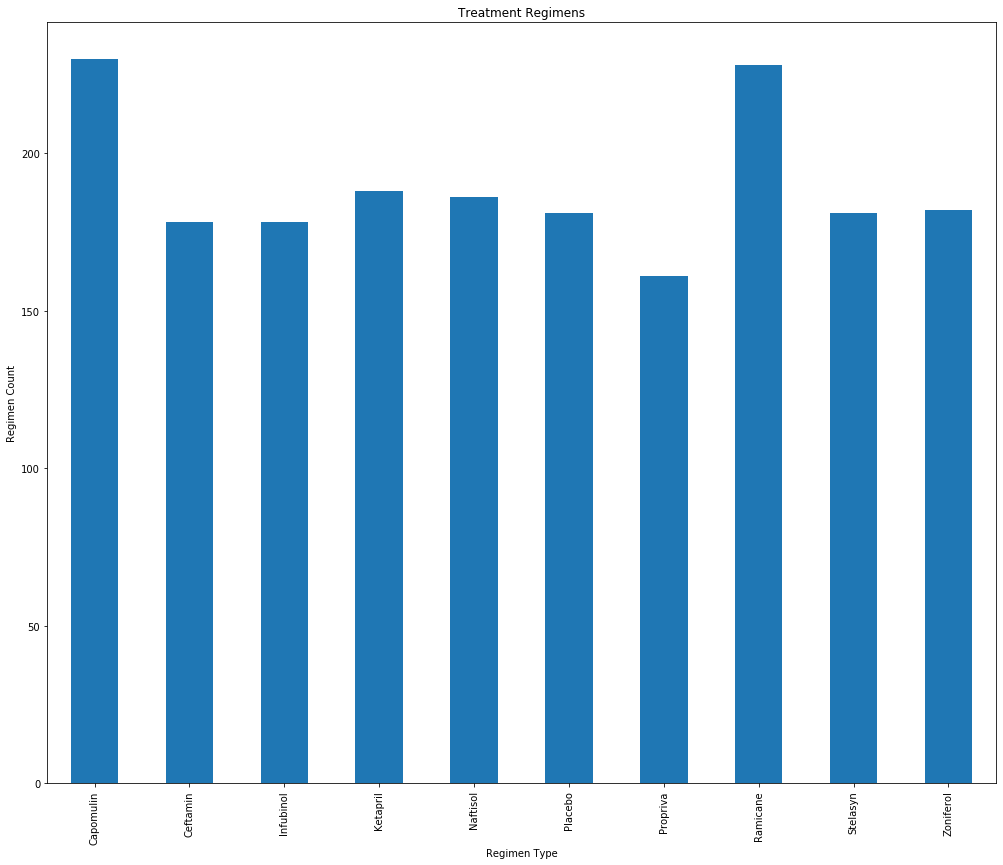

In [266]:
# Generate the bar plot with pandas

regimentypecount = sortedmerge_df.groupby(["Drug Regimen"]).count()["Mouse ID"].plot(kind="bar", figsize=(17,14))
                                                                                                        
                                                                                                    

# State graph labels

plt.xlabel("Regimen Type")
plt.ylabel("Regimen Count")
plt.title("Treatment Regimens")


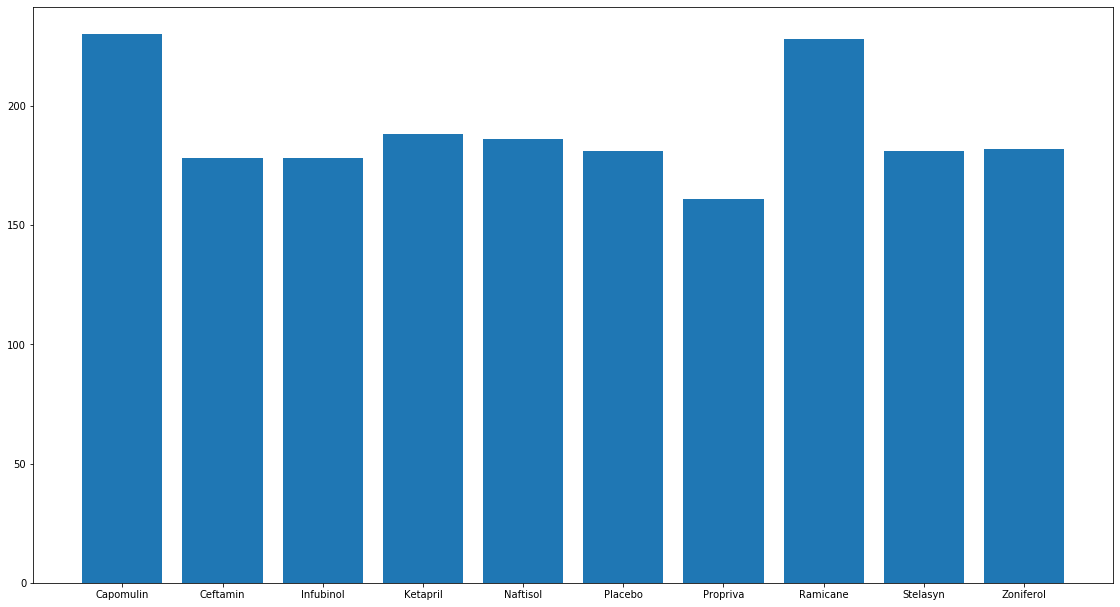

[Text(0, 0, 'R'),
 Text(1, 0, 'e'),
 Text(2, 0, 'g'),
 Text(3, 0, 'i'),
 Text(4, 0, 'm'),
 Text(5, 0, 'e'),
 Text(6, 0, 'n'),
 Text(7, 0, ' '),
 Text(8, 0, 'T'),
 Text(9, 0, 'y')]

In [268]:
# Generate the bar plot with pyplot
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2])
drug = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
ax.bar(drug,count)
plt.show()

ax.set_ylabel('Regimen Count')
ax.set_title('Treatment Regimens')
ax.set_xticklabels('Regimen Type')


## Pie plots

In [182]:
# Group to find counts of each sex
gender = sortedmerge_df.groupby(["Mouse ID","Sex"])

# Creat a dataframe
gender_df = pd.DataFrame(gender.size())

# Count the total for each gorup
gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())

# Create a Count column
gender_df.columns = ["Count"]

# Create a percentage column
gender_df["Percentage"] = (100*(gender_df["Count"]/gender_df["Count"].sum()))

gender_df

,Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


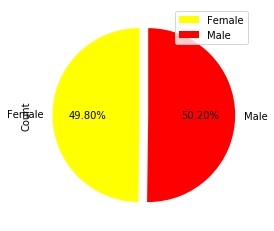

In [183]:
# Generate a pie plot using pandas

colors = ['yellow','red']

plot = gender_df.plot.pie(y="Count",figsize=(4,4), colors = colors, startangle=90, explode = explode, shadow = False, autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x2dec8cf0e88>,
 [Text(-1.1499772998925522, 0.007225630203328695, 'Female'),
  Text(1.1499773005690594, -0.007225522534683575, 'Male')],
 [Text(-0.6499871695044859, 0.004084051854055349, '49.80%'),
  Text(0.6499871698868596, -0.004083990997864629, '50.20%')])

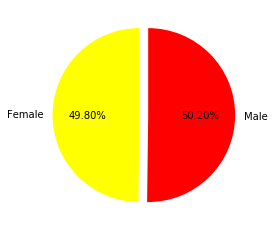

In [184]:
# Generate a pie plot using pyplot

sizes = [49.80,50.20]
colors = ['yellow', 'red']
labels = ["Female","Male"]
explode = (0.05, 0.05)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=False, startangle=90)



## Quartiles, outliers and boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimenes from the data frame in order to perform IQR test on each

topregimen = sortedmerge_df[sortedmerge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
topregimen = topregimen.sort_values(["Timepoint"], ascending=True)

topregimen



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
85,j913,Ramicane,Female,4,17,0,45.000000,0
1637,v766,Infubinol,Male,16,27,0,45.000000,0
837,f436,Ceftamin,Female,3,25,0,45.000000,0
668,c326,Infubinol,Female,18,25,0,45.000000,0
1615,v339,Infubinol,Male,20,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
337,j119,Capomulin,Female,7,23,45,38.125164,1
204,i738,Capomulin,Female,23,20,45,37.311846,2
272,d251,Ramicane,Female,8,19,45,37.311236,2
834,f345,Infubinol,Male,23,26,45,60.918767,1


In [231]:
#Refine the chart

topregimen = topregimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

topregimen

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
85,Ramicane,j913,0,45.000000
1637,Infubinol,v766,0,45.000000
837,Ceftamin,f436,0,45.000000
668,Infubinol,c326,0,45.000000
1615,Infubinol,v339,0,45.000000
...,...,...,...,...
337,Capomulin,j119,45,38.125164
204,Capomulin,i738,45,37.311846
272,Ramicane,d251,45,37.311236
834,Infubinol,f345,45,60.918767


In [232]:
# Capture  final tumor volume of each mouse

topregimensorted_df = topregimen.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

topregimensorted_df

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [233]:
# format to a data frame

topregimensorted_df = topregimensorted_df.to_frame()

topregimensorted_df


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [234]:
#Create a list to use as labels and dataframe
effectivedrugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


In [235]:
# Add new indexing
topregimensorted_df = topregimensorted_df.reset_index()

topregimensorted_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [236]:
# Groupby drug
bydrug = topregimensorted_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

bydrug

Drug Regimen
Capomulin    [38.98287774, 38.93963263, 30.48598484, 37.074...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane     [38.407618299999996, 43.04754260000001, 38.810...
Name: Tumor Volume (mm3), dtype: object

In [237]:
# Push into a dataframe
bydrug_df = pd.DataFrame(bydrug)

bydrug_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."


In [238]:
# Sort
bydrug_df = bydrug_df.reindex(effectivedrugs)

bydrug_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."


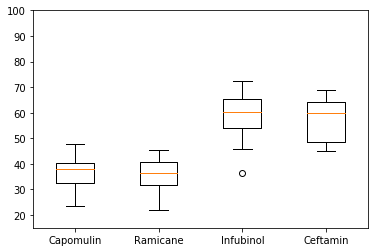

In [241]:
# Generate the chart
tumorvolume = [vol for vol in bydrug_df['Tumor Volume (mm3)']]

plt.boxplot(tumorvolume, labels=effectivedrugs)

plt.ylim(15, 100)
plt.show()

## Line and scatter plots

In [199]:
# Generate a line plot

lineplot_df = sortedmerge_df[sortedmerge_df["Mouse ID"].isin(["b128"])]

lineplot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2
306,b128,Capomulin,Female,9,22,30,40.605335,1
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0


In [200]:
# Refine columns
lineplot_df = lineplot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

lineplot_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
307,b128,35,37.967644
308,b128,40,38.379726
309,b128,45,38.982878
306,b128,30,40.605335
304,b128,20,42.731552
305,b128,25,43.262145
302,b128,10,43.270852
303,b128,15,43.784893
300,b128,0,45.000000
301,b128,5,45.651331


In [201]:
# Add new indexing 
lineplot_df = lineplot_df.reset_index()

lineplot_df

,index,Mouse ID,Timepoint,Tumor Volume (mm3)
0,307,b128,35,37.967644
1,308,b128,40,38.379726
2,309,b128,45,38.982878
3,306,b128,30,40.605335
4,304,b128,20,42.731552
5,305,b128,25,43.262145
6,302,b128,10,43.270852
7,303,b128,15,43.784893
8,300,b128,0,45.000000
9,301,b128,5,45.651331


In [202]:
# Romove Original Index
lineplot_df = lineplot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

lineplot_df


,Mouse ID,Timepoint,Tumor Volume (mm3)
0,b128,35,37.967644
1,b128,40,38.379726
2,b128,45,38.982878
3,b128,30,40.605335
4,b128,20,42.731552
5,b128,25,43.262145
6,b128,10,43.270852
7,b128,15,43.784893
8,b128,0,45.000000
9,b128,5,45.651331


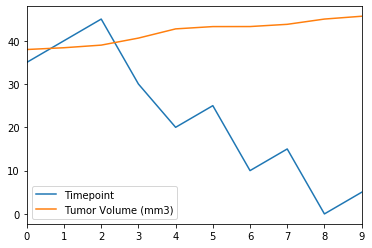

In [203]:
linegraph = lineplot_df.plot.line()

In [204]:
# Generate a scatter plot 
scatterdata_df = sortedmerge_df[sortedmerge_df["Drug Regimen"].isin(["Capomulin"])]

scatterdata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
28,x401,Capomulin,Female,16,15,40,28.167397,0
17,s185,Capomulin,Female,3,17,35,28.328531,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
...,...,...,...,...,...,...,...,...
384,r944,Capomulin,Male,12,25,15,47.373423,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


In [194]:
# Refine Columns
scatterdata_df = topregimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

scatterdata_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
85,j913,17,45.000000
1637,v766,27,45.000000
837,f436,25,45.000000
668,c326,25,45.000000
1615,v339,26,45.000000
...,...,...,...
337,j119,23,38.125164
204,i738,20,37.311846
272,d251,19,37.311236
834,f345,26,60.918767


In [195]:
# Sort on weight
scatterdata_df =scatterdata_df.sort_values(["Weight (g)"], ascending=True)

scatterdata_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
22,x401,15,39.113891
20,x401,15,45.000000
29,x401,15,28.484033
25,x401,15,36.617120
21,x401,15,45.473753
...,...,...,...
1632,v719,30,54.048608
988,j296,30,54.005342
1395,q132,30,51.909025
987,j296,30,50.701280


In [196]:
# Add new indexing
scatterdata_df = scatterdata_df.reset_index()

scatterdata_df

,index,Mouse ID,Weight (g),Tumor Volume (mm3)
0,22,x401,15,39.113891
1,20,x401,15,45.000000
2,29,x401,15,28.484033
3,25,x401,15,36.617120
4,21,x401,15,45.473753
...,...,...,...,...
809,1632,v719,30,54.048608
810,988,j296,30,54.005342
811,1395,q132,30,51.909025
812,987,j296,30,50.701280


In [197]:
averageweight = scatterdata_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

averageweight

Weight (g)
15    36.182040
16    36.766850
17    38.039595
18    37.882878
19    40.490692
20    40.282715
21    41.600328
22    42.426122
23    47.271856
24    44.628647
25    48.462187
26    52.662588
27    53.809897
28    53.673552
29    52.384389
30    51.942406
Name: Tumor Volume (mm3), dtype: float64

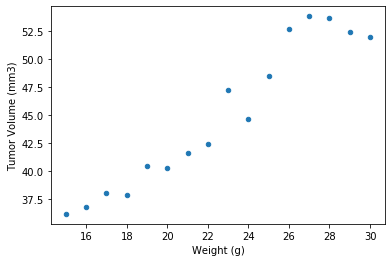

In [198]:
scatterimage = pd.DataFrame(averageweight).reset_index()

scatterplot = scatterimage.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
